In [64]:
import numpy as np
import h5py


# with h5py.File('D:/finale.hdf5', 'r') as f:
#     sim = np.array(f['x'])


frame = sim[1450]
#save as csv
np.savetxt("poss_beforemerge.csv", frame, delimiter = ",")

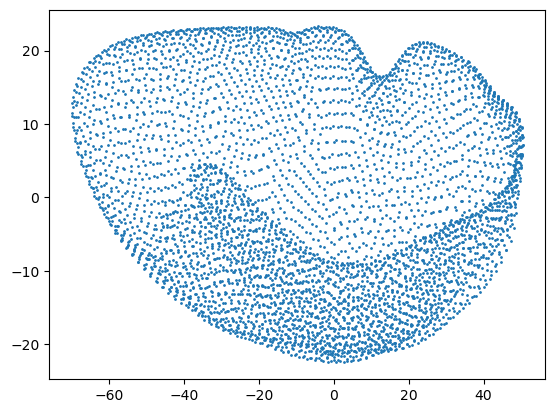

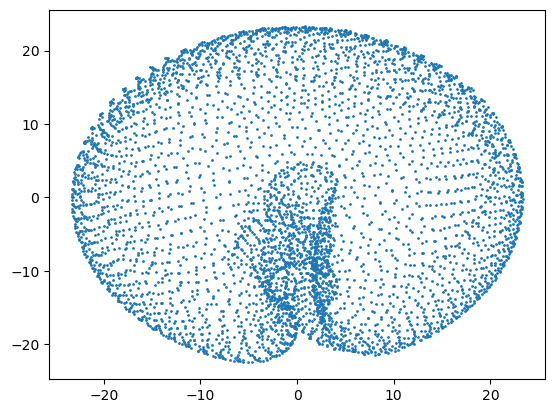

In [65]:
import matplotlib.pyplot as plt

plt.scatter(frame[:,0], frame[:,2], s=1)  
plt.show()
plt.scatter(frame[:,1], frame[:,2], s=1, )  
plt.show()


In [ ]:
import Part
import numpy as np

doc = FreeCAD.newDocument()
poss = np.genfromtxt("C:/Users/jakob/Documents/Thesis/Mesh/poss_beforemerge.csv", delimiter=",")
spheres = []
for i, pos in enumerate(poss):
    p = FreeCAD.Vector(pos)

    sphere = Part.makeSphere(2, p)

    spheres.append(sphere)
    

In [ ]:
fuses = []
chunk = int(len(spheres)/50)
for i in range(50):
    fuse = spheres[i*chunk]
    fuse = fuse.fuse(spheres[i*chunk+1:(i+1)*chunk])
    fuses.append(fuse)

In [ ]:
metafuses = []
chunk = int(len(fuses)/10)
for i in range(10):
    metafuse = fuses[i*chunk]
    metafuse = metafuse.fuse(fuses[i*chunk+1:(i+1)*chunk])
    metafuses.append(metafuse)

In [ ]:
metametafuses = []
chunk = int(len(metafuses)/5)
for i in range(5):
    metametafuse = metafuses[i*chunk]
    metametafuse = metametafuse.fuse(metafuses[i*chunk+1:(i+1)*chunk])
    metametafuses.append(metametafuse)

In [ ]:
finalfuse = metametafuses[0].fuse(metametafuses[1:])

In [ ]:
Part.show(finalfuse)
